# Analyzing Seattle Airbnb Open Data Using the CRISP-DM Process  


In this project [Seattle Airbnb Open data](https://www.kaggle.com/airbnb/seattle/data) is analyzed using the CRISP-DM Process in order to answer business questions. The project is part of Udacity Data Scientist Nanodegree.     
   
The CRISP-DM Process is short for Cross Industry Process for Data Mining Process, which mainly consists of 6 steps, Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation and Deployment.    
    
Data analyzed in this project is provided by Airbnb on Kaggle platform. Data describes the listing activity of homestays in Seattle, WA.     
    
The following Airbnb activity is included in this Seattle dataset:     
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 

In [2]:
# load datasets
calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('data/listings.csv')
reviews = pd.read_csv('data/reviews.csv')

### 1. Business Understanding  & 2. Data Understanding   
 
Since data has been provided, the first two steps are done in tandem in this project.    


In this project, the below questions are particularly of interest - 
- When are the busiest times of the year to visit Seattle that we want to avoid? Is there a price spike during busy time in Seattle?
- How's price like for different neighborhoods? 
- What factors that influence the price the most that we should keep in mind when hunting for a bargain?


First, let's take a look at a few first rows of each dataset and check how many rows and columns are in these three datasets.

In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [4]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [6]:
# size of three datasets
calendar.shape, listings.shape, reviews.shape

((1393570, 4), (3818, 92), (84849, 6))

Next, let's check which columns have missing values and how much percentage of missing values exist for that column. 

In [7]:
set(calendar.columns[calendar.isnull().mean() !=0])

{'price'}

In [8]:
set(listings.columns[listings.isnull().mean() ==0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [9]:
set(reviews.columns[reviews.isnull().mean() !=0]) 

{'comments'}

A wordcloud is created below for the blog. 

In [ ]:
# wordcloud
description_corpus = ' '.join(listings['description'])
#description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
#plt.figure(figsize = (16,8))
#plt.imshow(description_wordcloud)
#plt.axis('off')
#plt.show()

################
x, y = np.ogrid[:3000, :3000]

mask = (x - 1500) ** 2 + (y - 1500) ** 2 > 1500 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask, height = 4000, width = 4000)
wc.generate(description_corpus)

plt.figure(figsize = (10,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
#plt.show()
plt.savefig("figs/wordcloud.png")

First, I'd like to know when the busiest times of the year are to visit Seattle. Calendar dataset can help answer this question. Within Calendar dataset, it's one record per listing per day with the availability and price. I'm only interested in year 2016.    
In order to know when the busiest time of the year is, I'd like to know the number of available listings by each month. Ideally, the fewer listings that are available in a month, the busier that month is.     

In [11]:
# data cleaning - convert price string to numeric
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# data cleaning - datetime
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
# only interested in year 2016 
calendar = calendar[calendar['year'] == 2016]

In [12]:
# How many listings are available (for at least one day) in each month?
avail_listing = calendar[calendar['available'] == 't'].drop_duplicates(['listing_id', 'month']).groupby(['year', 'month']).count().sort_values('listing_id', ascending = False)['listing_id']
avail_listing = avail_listing.reset_index(level=['month', 'year'])
avail_listing

,year,month,listing_id
0,2016,4,3002
1,2016,3,2950
2,2016,2,2895
3,2016,1,2868
4,2016,12,2866
5,2016,11,2771
6,2016,6,2720
7,2016,5,2705
8,2016,10,2694
9,2016,9,2649


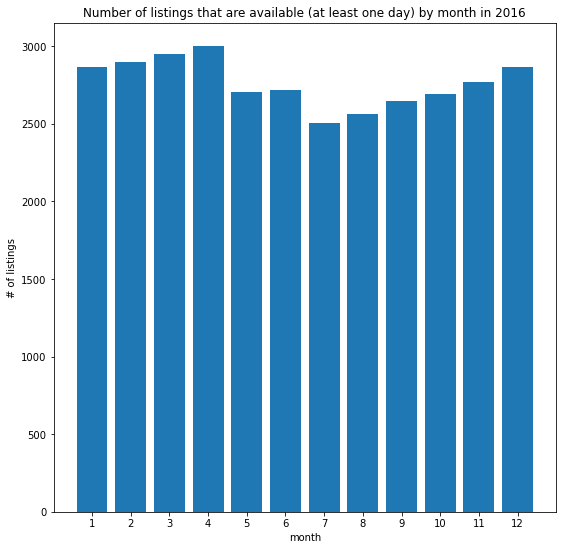

In [13]:
# make a plot 
x = avail_listing['month']
y = avail_listing['listing_id']

plt.figure(figsize = (9, 9))
plt.bar(x, y)
plt.xlabel("month")
plt.ylabel("# of listings")
plt.title("Number of listings that are available (at least one day) by month in 2016")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
#plt.show()

plt.savefig("figs/available_listing.png")

From the graph above, it's clear to notice that the available listings in July and August are the fewest of the whole year, which means that July and August are considered as the busiest time of the year 2016. 
     
Next I would like how much prices spike during the busy time. Calendar dataset is used here to answer this question. In order to know how much prices spike, I will look at the prices of the available listings during the busy time, and compare them with the prices of the available listings during the not-so-busy time. 

In [14]:
# when a listing is available, what's the price like? (remove duplicates)
listing_price = calendar[calendar['available'] == 't'][['listing_id', 'price', 'month', 'year']]

#and take average of prices of those listings by month
price_by_month = listing_price.groupby(['month', 'year']).mean().sort_values('price', ascending = False)
price_by_month = price_by_month.reset_index(level=['month', 'year'])
price_by_month

,month,year,listing_id,price
0,7,2016,5.200952e+06,152.094150
1,8,2016,5.240480e+06,150.656594
2,6,2016,5.170853e+06,147.473137
3,9,2016,5.279361e+06,143.255949
4,5,2016,5.234380e+06,139.538183
5,12,2016,5.421078e+06,137.251835
6,10,2016,5.310734e+06,137.031939
7,11,2016,5.349253e+06,135.688738
8,4,2016,5.244016e+06,135.097005
9,3,2016,5.383965e+06,128.644488


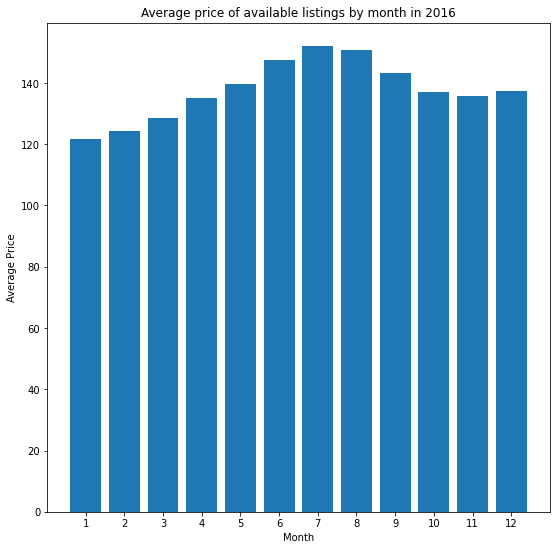

In [15]:
# make a plot 
x = price_by_month['month']
y = price_by_month['price']

plt.figure(figsize = (9, 9))
plt.bar(x, y)
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Average price of available listings by month in 2016")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
# plt.show()

plt.savefig("figs/price_by_month.png")

Next, calculate the price spike. Compare the average price of available listings in July and August to the average price of available listings in the rest of the year. 

In [16]:
# prices spike by how much % 
price_busy = price_by_month[price_by_month['month'].isin([7,8])]['price'].mean()
price_rest = price_by_month[~price_by_month['month'].isin([7,8])]['price'].mean()

100 * (price_busy - price_rest)/price_rest

12.142896448666303

Here it shows the prices of Airbnb in Seattle spikes to almost 12% compared to other times in Seattle. Therefore, in order to save money, visitors can avoid summer time. 

Next, I'm interested to know if the price of listings also varies among different neighborhoods. 

In [17]:
# merge calendar dataset wtih listings dataset
listings_calendar = listings[['id','neighbourhood_group_cleansed']].merge(calendar, how='inner', left_on='id', right_on='listing_id')

# calculate average price of available listings by neighborhood and month 
price_neighbor = listings_calendar[listings_calendar['available'] == 't'][['neighbourhood_group_cleansed','price', 'month', 'year']]
price_neighbor = price_neighbor.groupby(['neighbourhood_group_cleansed','month', 'year']).mean()
price_neighbor = price_neighbor.reset_index(level=['neighbourhood_group_cleansed','month', 'year'])
price_neighbor

,neighbourhood_group_cleansed,month,year,price
0,Ballard,1,2016,106.819085
1,Ballard,2,2016,110.033227
2,Ballard,3,2016,113.237420
3,Ballard,4,2016,120.999350
4,Ballard,5,2016,122.753247
...,...,...,...,...
199,West Seattle,8,2016,159.073464
200,West Seattle,9,2016,154.262692
201,West Seattle,10,2016,147.409162
202,West Seattle,11,2016,146.429412


In [18]:
price_neighbor[price_neighbor.month == 7]

,neighbourhood_group_cleansed,month,year,price
6,Ballard,7,2016,138.565895
18,Beacon Hill,7,2016,105.394449
30,Capitol Hill,7,2016,144.035177
42,Cascade,7,2016,167.563328
54,Central Area,7,2016,145.537473
66,Delridge,7,2016,94.989714
78,Downtown,7,2016,230.343055
90,Interbay,7,2016,126.659420
102,Lake City,7,2016,101.628116
114,Magnolia,7,2016,211.078224


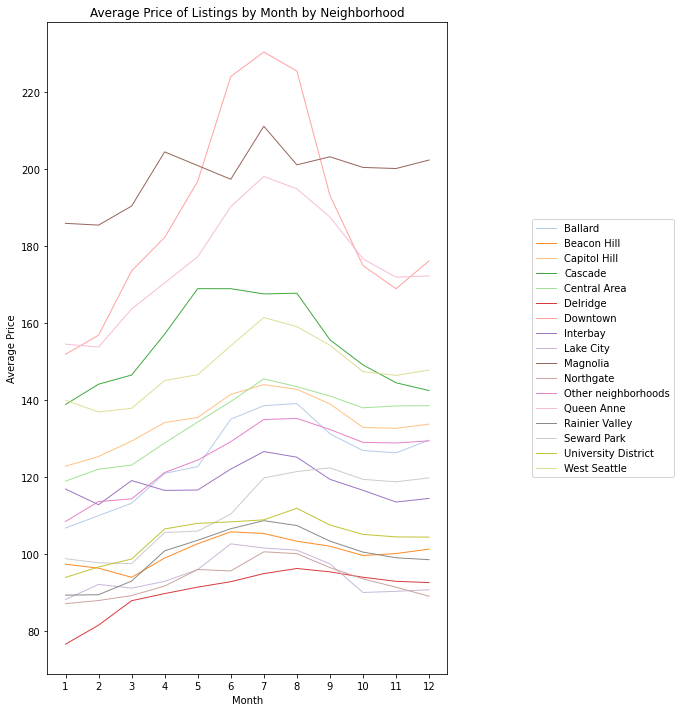

In [19]:
# make a plot of average price of available listings by neighborhood and month
# pivot the dataset 
price_neighbor_p = price_neighbor.pivot(index=['month'], columns='neighbourhood_group_cleansed', values='price')

# create a color palette
palette = plt.get_cmap('tab20')
# figure size 
plt.figure(figsize = (10,10))
# multiple line plot
num=0
for column in price_neighbor_p:
    num+=1
    plt.plot(price_neighbor_p.index, price_neighbor_p[column], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)

# Add legend
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
 
# Add titles
plt.title("Average Price of Listings by Month by Neighborhood")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(np.arange(min(price_neighbor_p.index), max(price_neighbor_p.index)+1, 1.0))
plt.tight_layout()
plt.savefig("figs/price_by_neighbor.png")

The graph suggest that Delridge, Northgate and Lake City tend to have available listings at a lower price throughout the year; while the available lisitngs in Downtown, Magnolia and Queen Anne tend to be higher. 
    
Next, I'm interested to know besides neighborhood and time, what other factors (numerical) might correlate to the price of a listing. To achieve this, a heatmap of correlation is drawn. 

In [20]:
# a list of numerical variables
corr_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit', 'cleaning_fee', 'extra_people', 'number_of_reviews', 'review_scores_rating']
# price columns that need cleaning
col_price = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

listings_corr = listings[corr_cols]

# clean price format to numeric values
for col in col_price:
    listings_corr.loc[:, col] = listings_corr.loc[:, col].replace({'\$': '', ',': ''}, regex=True).copy()
    listings_corr.loc[:, col] = listings_corr.loc[:, col].astype(float).copy()
    listings_corr.loc[:, col] = listings_corr.loc[:, col].fillna(0).copy()

listings_corr.head(10)


/Users/shuqizhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,number_of_reviews,review_scores_rating
0,4,1.0,1.0,1.0,85.0,0.0,0.0,5.0,207,95.0
1,4,1.0,1.0,1.0,150.0,100.0,40.0,0.0,43,96.0
2,11,4.5,5.0,7.0,975.0,1000.0,300.0,25.0,20,97.0
3,3,1.0,0.0,2.0,100.0,0.0,0.0,0.0,0,NaN
4,6,2.0,3.0,3.0,450.0,700.0,125.0,15.0,38,92.0
5,2,1.0,1.0,1.0,120.0,0.0,40.0,30.0,17,95.0
6,2,1.0,1.0,1.0,80.0,150.0,0.0,10.0,58,99.0
7,2,1.0,1.0,1.0,60.0,150.0,25.0,0.0,173,97.0
8,2,1.0,1.0,1.0,90.0,0.0,0.0,0.0,8,97.0
9,4,1.0,1.0,1.0,150.0,100.0,40.0,0.0,32,97.0


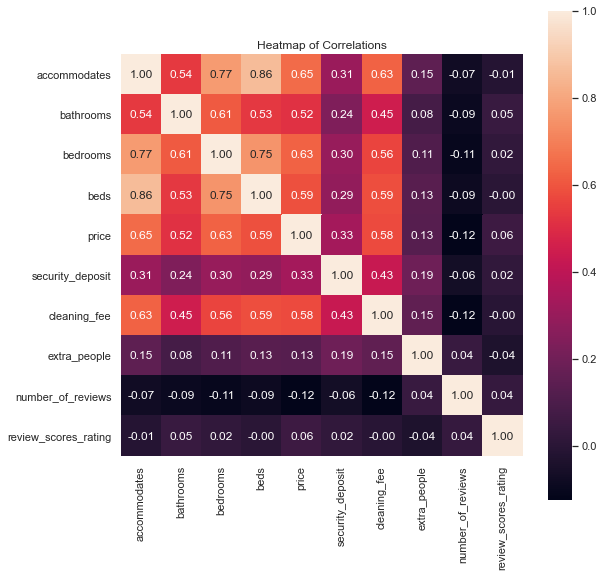

In [21]:
# compute the correlation matrix
corr = listings_corr.corr()

# make a heatmap of correlation 
sns.set_theme(style="white")

# set up figure size
plt.figure(figsize = (9,9))

corr_heatmap = sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = corr_cols, xticklabels = corr_cols)

corr_heatmap.set_title('Heatmap of Correlations')

fig = corr_heatmap.get_figure()
fig.savefig("figs/heatmap_corr.png") 

From the above heatmap, it appers that values of multiple factors correlate with the price of a listing, such as how many people the place can accomodate, how many bathrooms, how many bedrooms, how many beds, the price of security deposit and the price of cleaning fee. 
    
Next, let's do preparation work on the dataset for the following modeling work. 

### 3. Data Preparation   
Data prepartion in this part include multiple steps -      
1. First, the columns of prices will be transformed to numerical values.    
2. Second, find out the columns that have missing values and impute the missing data using different methods accordingly.    
3. Then, encode all the catogorical variables.    


In [22]:
# select out some variables that might have an impact on price
listings_simple = listings[['property_type', 'room_type', 'accommodates', 'bathrooms', 
                            'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit', 
                            'cleaning_fee', 'extra_people', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
                            'host_response_time',  'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 
                            'neighbourhood_group_cleansed', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification',
                            'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                            'review_scores_communication', 'review_scores_location','review_scores_value',
                            'calculated_host_listings_count', 'guests_included', 'minimum_nights', 'maximum_nights', 
                            'host_response_rate'
                           ]]


In [23]:
# 1. change price format to numeric values
col_price = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']

for col in col_price:
    listings_simple.loc[:, col] = listings_simple.loc[:, col].replace({'\$': '', ',': ''}, regex=True).copy()
    listings_simple.loc[:, col] = listings_simple.loc[:, col].astype(float).copy()
    listings_simple.loc[:, col] = listings_simple.loc[:, col].copy()


/Users/shuqizhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [24]:
# 2. change percentage format to numeric values 
listings_simple.loc[:, 'host_response_rate'] = listings_simple.loc[:, 'host_response_rate'].replace({'%': ''}, regex=True).copy()
listings_simple.loc[:, 'host_response_rate'] = listings_simple.loc[:, 'host_response_rate'].astype(float).copy()
listings_simple.loc[:, 'host_response_rate'] = listings_simple.loc[:, 'host_response_rate']/ 100


In [25]:
# columns that have missing values 
set(listings_simple.columns[listings_simple.isnull().mean() !=0])

{'bathrooms',
 'bedrooms',
 'beds',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_rate',
 'host_response_time',
 'property_type',
 'review_scores_accuracy',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_rating',
 'review_scores_value',
 'security_deposit'}

In [26]:
# for 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 
# 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
# 'review_scores_communication', 'review_scores_location','review_scores_value', 
# 'host_response_rate'
# missing values are replaced with average
fill_mean = lambda col: col.fillna(col.mean())
col_mean = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating',
           'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
           'review_scores_communication', 'review_scores_location','review_scores_value', 
           'host_response_rate']
listings_simple[col_mean] = listings_simple[col_mean].apply(fill_mean, axis=0).copy()

# for 'cleaning_fee', 'security_deposit', missing values are replaced with 0 
listings_simple.loc[:, ('cleaning_fee', 'security_deposit')] = listings_simple.loc[:, ('cleaning_fee', 'security_deposit')].fillna(0).copy()

# for 'property_type', missing values are replaced with 'Other'
# listings_simple.loc[:, 'property_type'] = listings_simple.loc[:, 'property_type'].fillna('Other').copy()

listings_simple.head(10)

/Users/shuqizhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/shuqizhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,guests_included,minimum_nights,maximum_nights,host_response_rate
0,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,...,10.000000,10.000000,10.000000,9.000000,10.000000,2,2,1,365,0.960000
1,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,6,1,2,90,0.980000
2,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,2,10,4,30,0.670000
3,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,0.0,...,9.556398,9.786709,9.809599,9.608916,9.452245,1,1,1,1125,0.948868
4,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,...,9.000000,10.000000,10.000000,9.000000,9.000000,1,6,1,1125,1.000000
5,House,Private room,2,1.0,1.0,1.0,Real Bed,120.0,0.0,40.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,1,1,1,6,0.948868
6,House,Private room,2,1.0,1.0,1.0,Real Bed,80.0,150.0,0.0,...,10.000000,10.000000,10.000000,10.000000,10.000000,1,1,3,14,1.000000
7,Cabin,Private room,2,1.0,1.0,1.0,Real Bed,60.0,150.0,25.0,...,10.000000,10.000000,10.000000,9.000000,10.000000,5,1,2,7,1.000000
8,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,90.0,0.0,0.0,...,9.000000,10.000000,9.000000,10.000000,10.000000,1,1,3,1125,0.948868
9,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,...,10.000000,10.000000,10.000000,10.000000,9.000000,6,1,2,365,0.980000


In [27]:
# confirm all the missing numerical values are addressed
set(listings_simple.columns[listings_simple.isnull().mean() !=0])

{'host_has_profile_pic',
 'host_identity_verified',
 'host_is_superhost',
 'host_response_time',
 'property_type'}

In [28]:
# 'property_type', 'room_type', 'bed_type', 'cancellation_policy', 
# 'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_response_time'
print(listings_simple.property_type.unique())
print(listings_simple.room_type.unique())
print(listings_simple.bed_type.unique())
print(listings_simple.cancellation_policy.unique())
print(listings_simple.host_has_profile_pic.unique())
print(listings_simple.host_identity_verified.unique())
print(listings_simple.host_is_superhost.unique())
print(listings_simple.host_response_time.unique())

['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]
['Entire home/apt' 'Private room' 'Shared room']
['Real Bed' 'Futon' 'Pull-out Sofa' 'Airbed' 'Couch']
['moderate' 'strict' 'flexible']
['t' 'f' nan]
['t' 'f' nan]
['f' 't' nan]
['within a few hours' 'within an hour' nan 'within a day'
 'a few days or more']


In [29]:
# one hot encode the categorical variables 
cat_col = ['property_type', 'room_type', 'bed_type', 'cancellation_policy',
          'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'host_response_time',
          'neighbourhood_group_cleansed', 
           'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification' 
          ]
cat_df = pd.get_dummies(listings_simple[cat_col], prefix=cat_col, prefix_sep='_', drop_first=False, dummy_na=True)
listings_simple = pd.concat([listings_simple.drop(cat_col, axis=1), cat_df], axis=1)
listings_simple.head()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,extra_people,number_of_reviews,review_scores_rating,...,neighbourhood_group_cleansed_nan,instant_bookable_f,instant_bookable_t,instant_bookable_nan,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_profile_picture_nan,require_guest_phone_verification_f,require_guest_phone_verification_t,require_guest_phone_verification_nan
0,4,1.0,1.0,1.0,85.0,0.0,0.0,5.0,207,95.000000,...,0,1,0,0,1,0,0,1,0,0
1,4,1.0,1.0,1.0,150.0,100.0,40.0,0.0,43,96.000000,...,0,1,0,0,0,1,0,0,1,0
2,11,4.5,5.0,7.0,975.0,1000.0,300.0,25.0,20,97.000000,...,0,1,0,0,1,0,0,1,0,0
3,3,1.0,0.0,2.0,100.0,0.0,0.0,0.0,0,94.539262,...,0,1,0,0,1,0,0,1,0,0
4,6,2.0,3.0,3.0,450.0,700.0,125.0,15.0,38,92.000000,...,0,1,0,0,1,0,0,1,0,0


### 4. Modeling   
In this part, Random Forest model is utilized for modeling work, in order to determine which variables (features) have influence on price of a listing.   


In [30]:
# split data into test and train datasets
X = listings_simple.drop(columns = 'price')
y = listings_simple[['price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [31]:
def RF_model(X_train, X_test, y_train, y_test):
    """
    input: dataframe
    output: predictions on test and train datasets and the model
    """
    
    
    # train Random Forest model
    forest = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=42, n_jobs=-1)
    
    # fit the model
    forest.fit(X_train, y_train.squeeze())
    
    # prediction
    y_train_preds = forest.predict(X_train)
    y_test_preds = forest.predict(X_test)
    
    return y_train_preds, y_test_preds, forest

In [32]:
y_train_preds, y_test_preds, forest = RF_model(X_train, X_test, y_train, y_test)

In [33]:
print('Random Forest MSE train: {}, test: {}'.format(mean_squared_error(y_train, y_train_preds), 
                                                    mean_squared_error(y_test, y_test_preds) ) )
print('Random Forest R^2 train: {}, test: {}'.format(r2_score(y_train, y_train_preds), 
                                                    r2_score(y_test, y_test_preds) ) )

Random Forest MSE train: 494.45176420243797, test: 3455.2489254375478
Random Forest R^2 train: 0.9378908253492386, test: 0.5965167139742397


From the above metrics, it appears that model doesn't perform on the test dataset as well as on the train dataset. Next, let's see which features show influence on the price of a listing. 
   

In [34]:
# put scores for each feature into a dataframe
# metrics = sorted(zip(X_train.columns, forest.feature_importances_), key=lambda x: x[1] * -1)
metrics = zip(X_train.columns, forest.feature_importances_)
feature_score = pd.DataFrame(metrics, columns = ['feature', 'score'])
feature_score = feature_score.sort_values(by = ['score'], ascending = False)
feature_score

,feature,score
2,bedrooms,0.355800
1,bathrooms,0.080518
5,cleaning_fee,0.078899
0,accommodates,0.058360
37,room_type_Entire home/apt,0.045397
...,...,...
85,instant_bookable_nan,0.000000
82,neighbourhood_group_cleansed_nan,0.000000
50,cancellation_policy_nan,0.000000
40,room_type_nan,0.000000


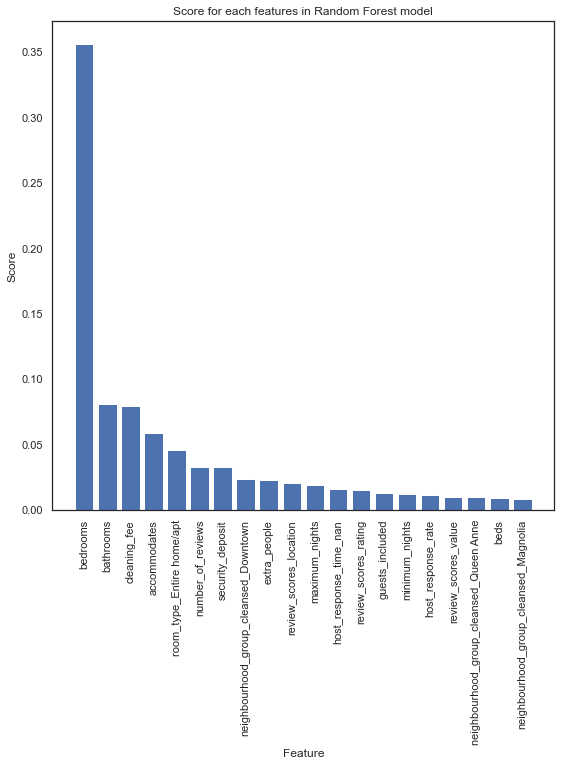

In [35]:
# only look at the first 20 features
x = feature_score['feature'][:20]
y = feature_score['score'][:20]
x_pos = np.arange(len(x))

# make a plot 

plt.figure(figsize = (9,9))
plt.bar(x, y)
plt.xlabel("Feature")
plt.ylabel("Score")
plt.title("Score for each features in Random Forest model")
plt.xticks(x_pos, x, rotation='vertical')

# plt.show()

plt.savefig("figs/feature_score.png")


### 5. Evaluation    
From the above plot, it appears that the number of bedrooms, cleaning fee, the number of bathrooms play an important rule in price of listing. The MSE and R2 score on test dataset suggest that the performance of the model on the test dataset is not as well as that on the training dataset, which suggests the model optimization is necessary for the next steps.   

### 6. Deployment    
The purpose of this project is to conduct analysis based on the provided open Airbnb data to give insights to visitors on how to save money when booking an Airbnb place in Seattle. Based on the above analysis, visitors can save money on Airbnb while visiting Seattle if they want to avoid busy times (e.g., July and August), choose places in more affordable neighborhoods (e.g., Delridge, Northgate and Lake City), and keep in mind that the number of bedrooms, cleaning fee and the number of bathrooms have a huge impact the prices if they want to find a bargain deal. 
